# Análise de Dados Financeiros de Empresas de Tecnologia Americanas

Esse notebook é um projeto de análise exploratória de dados (EDA) das maiores empresas do setor de tecnologia dos EUA. Esse projeto se propõem a responder questões importantes com base no conjunto de dados e gerar *insights* relevantes para investimentos nessas empresas.

In [67]:
# Versão da linguagem Python
from platform import python_version
print(f"A versão Python usada nesse notebook é a versão: {python_version()}")

A versão Python usada nesse notebook é a versão: 3.8.5


# Importando bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from matplotlib.ticker import FuncFormatter

# Carregando os dados

In [3]:
df = pd.read_csv('dados_tech_financas_completos.csv')

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(64, 18)

In [6]:
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,58328554,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96684345,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96861808,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,82687329,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,18092016,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559


In [7]:
df.tail()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)
59,Sony,SONY,2022-12-31,1.057686e+11,1.966601e+10,18.593428,Hardware,Japão,1.542021e+12,6.716688e+10,128137394,100.676027,96.326380,2.380149,98.501203,4.766339,6.320722e+10,59.759910
60,Sony,SONY,2023-03-31,9.461904e+10,2.113959e+10,22.341791,Hardware,Japão,1.542021e+12,6.716688e+10,100353869,207.221631,208.504725,2.381457,207.863178,9.388756,5.834240e+10,61.660319
61,Sony,SONY,2023-06-30,1.068989e+11,1.991614e+10,18.630829,Hardware,Japão,1.542021e+12,6.716688e+10,87404747,87.907300,91.764584,1.476251,89.835942,4.295053,6.215150e+10,58.140471
62,Sony,SONY,2023-09-30,1.023198e+11,2.703727e+10,26.424294,Hardware,Japão,1.542021e+12,6.716688e+10,18582841,182.431564,187.078176,1.616409,184.754870,6.589616,7.659874e+10,74.862125
63,Sony,SONY,2023-12-31,9.597361e+10,2.487947e+10,25.923245,Hardware,Japão,1.542021e+12,6.716688e+10,58318791,199.381820,215.028004,1.176269,207.204912,8.006535,5.825847e+10,60.702600


# Análise exploratória dos dados

In [8]:
df.columns

Index(['Empresa', 'Ticker', 'Data', 'Receita (USD)', 'Lucro Líquido (USD)',
       'Margem (%)', 'Setor', 'País', 'Valor de Mercado (USD)', 'Dívida (USD)',
       'Volume Negociado', 'Preço Abertura', 'Preço Fechamento',
       'Dividendos por Ação', 'Preço Médio', 'P/L', 'EBITDA Estimado (USD)',
       'Margem EBITDA (%)'],
      dtype='object')

In [9]:
df[df.duplicated()]

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)


In [10]:
df.isna()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
61,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

Empresa                   0
Ticker                    0
Data                      0
Receita (USD)             0
Lucro Líquido (USD)       0
Margem (%)                0
Setor                     0
País                      0
Valor de Mercado (USD)    0
Dívida (USD)              0
Volume Negociado          0
Preço Abertura            0
Preço Fechamento          0
Dividendos por Ação       0
Preço Médio               0
P/L                       0
EBITDA Estimado (USD)     0
Margem EBITDA (%)         0
dtype: int64

In [12]:
# Verifica o tipo de dados de cada coluna
df.dtypes

Empresa                    object
Ticker                     object
Data                       object
Receita (USD)             float64
Lucro Líquido (USD)       float64
Margem (%)                float64
Setor                      object
País                       object
Valor de Mercado (USD)    float64
Dívida (USD)              float64
Volume Negociado            int64
Preço Abertura            float64
Preço Fechamento          float64
Dividendos por Ação       float64
Preço Médio               float64
P/L                       float64
EBITDA Estimado (USD)     float64
Margem EBITDA (%)         float64
dtype: object

In [13]:
# Estatística de uma coluna especificada, nesse exemplo a coluna 'Margem (%)'
df['Margem (%)'].describe()  

count    64.000000
mean     22.380825
std       4.319339
min      15.553304
25%      18.294985
50%      22.473560
75%      26.356024
max      29.803304
Name: Margem (%), dtype: float64

In [14]:
# Verificando se há dados duplicados
df[df.duplicated()]

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)


In [15]:
# Verificando a soma de dados nulos
df.isnull().sum()

Empresa                   0
Ticker                    0
Data                      0
Receita (USD)             0
Lucro Líquido (USD)       0
Margem (%)                0
Setor                     0
País                      0
Valor de Mercado (USD)    0
Dívida (USD)              0
Volume Negociado          0
Preço Abertura            0
Preço Fechamento          0
Dividendos por Ação       0
Preço Médio               0
P/L                       0
EBITDA Estimado (USD)     0
Margem EBITDA (%)         0
dtype: int64

In [16]:
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%)
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,58328554,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96684345,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96861808,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,82687329,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,18092016,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559


# Funções utilizadas

In [17]:
# Função usada para formatar números astronômicos

def FormataValor(valor):
    if valor >= 1_000_000_000_000:
        return f"{valor / 1_000_000_000_000: .1f}Tri"
    elif valor >= 1_000_000_000:
        return f"{valor / 1_000_000_000: .1f}Bi"
    elif valor >= 1_000_000:
        return f"{valor / 1_000_000: .1f}Mi"
    elif valor >= 1_000: 
        return f"{valor / 1_000}K"
    else:
        return f"{valor: .2f}"
    
# Função para adicionar valores percentuais no topo de gráficos de barra

def AdicionaValoresBarra(ax, valores, deslocamento = 0.01, formatador = None, orientacao = 'v', fontsize = 12, cor = 'r'):
    # Se a orientação for Vertical
    if orientacao == 'v':
        for i, valor in enumerate(valores):
            texto = formatador(valor) if formatador else str(round(valor, 2))
            ax.text(i, valor + valor*deslocamento, texto,
                    va = 'center', fontsize = fontsize, 
                    color = cor, fontweight = 'bold')
    # Se a orientação for Horizontal
    elif orientacao == 'h':
        for i, valor in enumerate(valores):
            texto = formatador(valor) if formatador else str(round(valor, 2))
            ax.text(i, valor + valor*deslocamento, texto, 
                    ha = 'center', fontsize = fontsize, 
                    color = cor, fontweight = 'bold')     
            
# Função para converter os dados em valor absoluto

def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct * total / 100.0))
        return '{v:d} %'.format(v = val)
    return my_format

## 1. Qual empresa teve a maior receita total ao longo do período?

In [18]:
df_filtro_agrupamento = df.groupby('Empresa')['Receita (USD)'].sum().sort_values(ascending = False)  # Agrupa as empresas pela soma das receitas

df_indice_empresa = df_filtro_agrupamento.idxmax()  # Pega o índice da empresa com a maior receita

df_receita_empresa = df_filtro_agrupamento[df_indice_empresa] # Pega aempresa com o maior valor da receita com base no índice

print(f"A empresa com a maior receita é a: {df_indice_empresa}, e sua receita é de: U${FormataValor(df_receita_empresa)}.")

df_filtro_agrupamento = df.groupby('Empresa')['Receita (USD)'].sum().sort_values(ascending = False).reset_index() # Para fazer o gráfico

A empresa com a maior receita é a: Sony, e sua receita é de: U$ 796.9Bi.


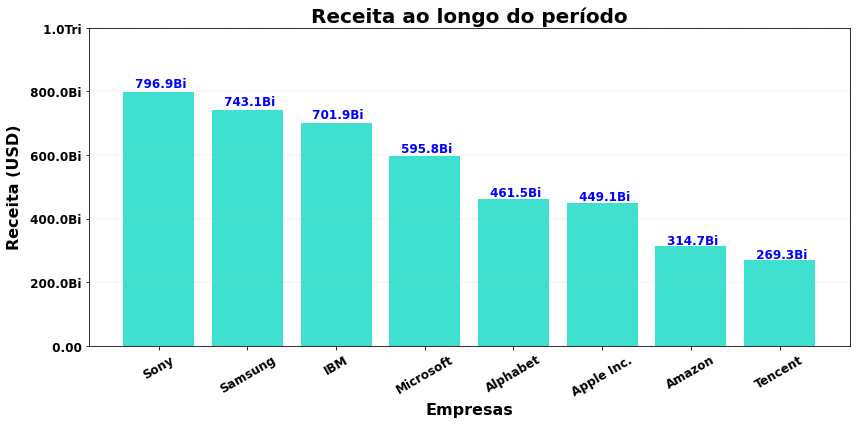

In [19]:
# Plot do gráfico

fig, ay = plt.subplots(figsize = (12, 6))

eixo_x = df_filtro_agrupamento['Empresa']
eixo_y = df_filtro_agrupamento['Receita (USD)']

ay.bar(eixo_x, eixo_y, color = 'turquoise')

# Título dos eixos
plt.title('Receita ao longo do período', fontsize = 20, fontweight = 'bold')
plt.xlabel('Empresas', fontsize = 16, fontweight = 'bold')
plt.ylabel('Receita (USD)', fontsize = 16, fontweight = 'bold')

plt.grid(True,
         linestyle = '--',
         linewidth = 0.3, 
         alpha = 0.8, 
         axis = 'y')

# Adiciona os valores no topo de cada barra
for i, valor in enumerate(eixo_y):
    ay.text(x = i, 
            y = valor + valor * 0.02,  # Pequeno deslocamento pra cima
            s = FormataValor(valor),   # Usa a função de formatação
            ha = 'center',             # alinhamento horizontal
            fontsize = 12, 
            fontweight = 'bold',
            color = 'b')

# Formatando os ticks do eixo y
ay.set_ylim(0, 1_000_000_000_000)  # Limite de 1 tri
ticks = np.arange(0, 1_000_000_000_000 + 1, 200_000_000_000)  # De 200 em 200 bi
ay.set_yticks(ticks)    # Configura os valores do eixo y de acordo com a lista 'ticks'
ay.set_yticklabels([FormataValor(t) for t in ticks], 
                   fontsize=12, 
                   fontweight='bold')

plt.xticks(rotation = 30, fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

## 2. Quais as 5 empresas com maior volume médio de negociações no período analisado?

In [20]:
df_agrupamento_volume = df.groupby('Empresa')['Volume Negociado'].agg('mean').nlargest(5)

df_agrupamento_volume_formatado = df_agrupamento_volume.apply(FormataValor) # Aplica a função à Serie de dados da 
                                                                            # coluna 'Volume Negociado'
print(df_agrupamento_volume_formatado)

Empresa
Samsung        104.9Mi
Amazon          84.9Mi
Sony            82.2Mi
Alphabet        78.4Mi
Apple Inc.      70.3Mi
Name: Volume Negociado, dtype: object


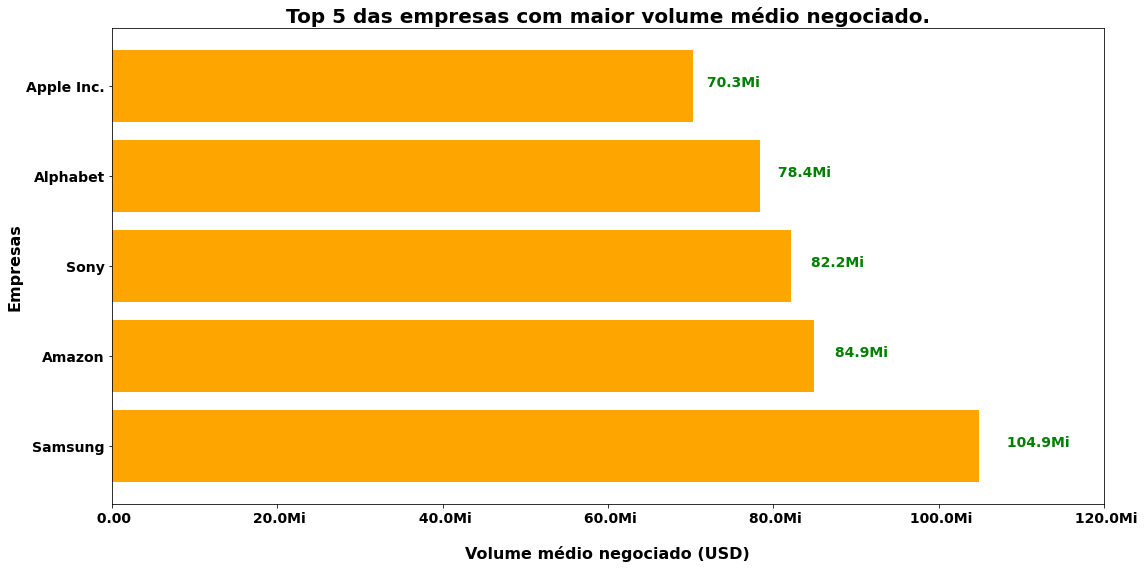

In [22]:
df_agrupamento_volume = df.groupby('Empresa')['Volume Negociado'].mean().nlargest(5).reset_index()

# Plot do gráfico
fig, ax = plt.subplots(figsize = (16, 8))

eixoX = df_agrupamento_volume['Volume Negociado']
eixoY = df_agrupamento_volume['Empresa']

# Gráfico de barras horizontais
ax.barh(eixoY, eixoX, color = 'orange')

# Título dos eixos
plt.title('Top 5 das empresas com maior volume médio negociado.', fontsize = 20, fontweight = 'bold')
plt.xlabel("Volume médio negociado (USD)", 
           fontsize = 16, 
           fontweight = 'bold',
           labelpad = 20)
plt.ylabel("Empresas", 
           fontsize = 16, 
           fontweight = 'bold')

# Adiciona os valores no topo de cada barra
for i, valor in enumerate(eixoX):
    ax.text(x = valor + valor * 0.065, 
            y = i,                     # um pequeno deslocamento pra cima
            s = FormataValor(valor),   # sua função linda de formatação
            ha = 'center',             # alinhamento horizontal
            fontsize = 14, 
            fontweight = 'bold',
            color = 'g')

# Formatando os ticks do eixo x
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([FormataValor(t) for t in ticks], 
                   fontsize = 14, 
                   fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

## 3. Qual foi a margem média de lucro das empresas de cada setor?

In [23]:
# AGRUPA por 'Setor' e 'Empresa' e calcula a soma somente da 'Margem (%)' para variáveis numéricas
margem_media_empresas = df.groupby(['Setor', 'Empresa']).mean(numeric_only = True)[['Margem (%)']]

# ORDENA por 'Setor' e 'Empresa' para garantir ordem estável
margem_media_empresas = margem_media_empresas.sort_values(by=['Setor', 'Empresa']).reset_index()

In [24]:
# DataFrame com margens médias por setor PARA O PIE PLOT
df_setores = margem_media_empresas.groupby('Setor').mean(numeric_only=True).reset_index()

In [25]:
# SOLUÇÃO ELEGANTE -> CRIA UM DICIONÁRIO DE CORES
# Define as cores para cada setor
cores_por_setor = {'Hardware': '#00dec0', 
                   'Software': '#e84c0e', 
                   'Internet': '#0ee820', 
                   'E-commerce': '#5d00de'}

cores_setores = [cores_por_setor[setor] for setor in df_setores['Setor']] # cores_por_setor[setor = Chave do dic]

In [26]:
# LISTA DE CORES DAS EMPRESAS
cores_empresas = [cores_por_setor[setor] for setor in margem_media_empresas['Setor']]

In [27]:
# Conta quantas empresas existem por setor reordenando os índices
empresas_por_setor = margem_media_empresas['Setor'].value_counts().reset_index()

empresas_por_setor.columns = ['Setor', 'TotalEmpresas']

# JUNTA com df_setores para manter a ordem
df_setores = df_setores.merge(empresas_por_setor, on = 'Setor')

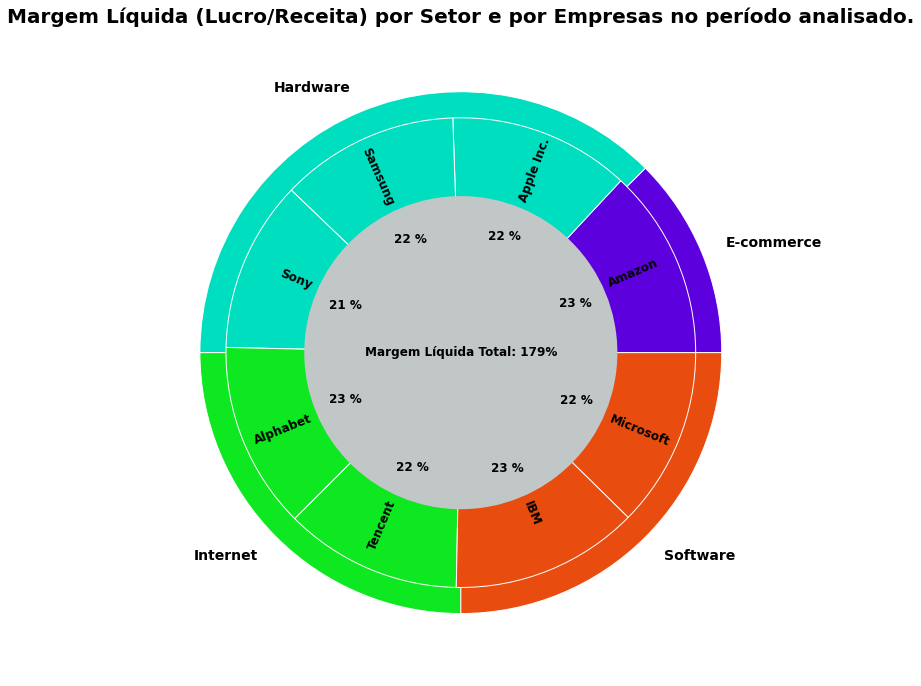

In [28]:
# Plot do gráfico 
# Pie plot com Seaborn

# Tamanho da figura
fig, ax = plt.subplots(figsize = (18,12))

# DEBUG VISUAL: Verifica a ordem real dos dados e das cores
#print("\n--- EMPRESAS E SUAS CORES ---")
#for empresa, setor, cor in zip(margem_media_empresas['Empresa'], margem_media_empresas['Setor'], cores_empresas):
#    print(f"{empresa:<15} | {setor:<12} | {cor}")

# Gráfico dos SETORES
p1 = ax.pie(df_setores['TotalEmpresas'], 
            radius = 1,
            labels = df_setores['Setor'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_setores,
            startangle = 0)

# Aumenta o tamanho e aplica negrito nas labels dos setores
for text in p1[1]:
    text.set_fontsize(14)
    text.set_fontweight('bold')

# Gráfico das EMPRESAS
p2 = ax.pie(margem_media_empresas['Margem (%)'],
            radius = 0.9,
            labels = margem_media_empresas['Empresa'],
            autopct = autopct_format(margem_media_empresas['Margem (%)']),
            colors = cores_empresas, 
            labeldistance = 0.675,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True,
            startangle = 0)

# Aumenta o tamanho e aplica negrito nas labels das empresas
for text in p2[1]:
    text.set_fontsize(12)
    text.set_fontweight('bold')
    
# Aumenta o tamanho e aplica negrito nas porcentagens (autopct)
for pct in p2[2]:
    pct.set_fontsize(12)
    pct.set_fontweight('bold')
    

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = '#c1c7c6')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Margem Líquida Total: ' + str(int(sum(margem_media_empresas['Margem (%)']))) + '%', 
             xy = (0, 0),
             ha = 'center',
             va = 'center',
             fontsize = 12,
             fontweight = 'bold')
plt.title('Margem Líquida (Lucro/Receita) por Setor e por Empresas no período analisado.', ha = 'center', va = 'center', fontsize = 20, fontweight = 'bold')
plt.show()


## 4. Qual o setor com maior média de crescimento de preço (diferença entre abertura e fechamento)?

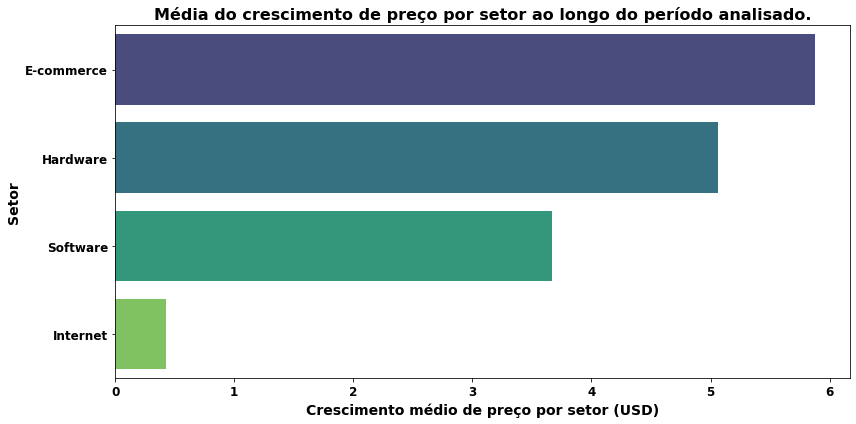

In [29]:
# Cria uma nova coluna com a diferença entre as colunas 'Preço Abertura' e 'Preço Fechamento'
df['Media de Crescimento Preço'] = df['Preço Fechamento'] - df['Preço Abertura']

# Gráfico de barras 
media_por_setor = df.groupby('Setor')['Media de Crescimento Preço'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
#sns.barplot(x=media_por_setor.values, y=media_por_setor.index)
sns.barplot(data = media_por_setor, 
            x = 'Media de Crescimento Preço', 
            y = 'Setor', 
            palette = 'viridis')

plt.title('Média do crescimento de preço por setor ao longo do período analisado.', 
          fontsize = 16, 
          fontweight = 'bold'
         )

plt.xlabel('Crescimento médio de preço por setor (USD)', 
           fontsize = 14, 
           fontweight = 'bold'
          )

plt.ylabel('Setor', fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()

**Figura 4**: Crescimento médio dos preços das ações por setor, calculado como a diferença entre o preço de fechamento e o preço de abertura. Valores positivos indicam setores com valorização média, enquanto valores negativos sugerem desvalorização das ações no período analisado.

In [30]:
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%),Media de Crescimento Preço
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,58328554,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204,-0.971014
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96684345,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429,5.163301
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96861808,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818,-13.357770
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,82687329,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755,-7.391408
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,18092016,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559,20.274029


## 4-1 Como evolui o crescimento do preço médio das ações de cada empresa ao longo dos trimestres em diferentes anos?

In [31]:
# Cria duas novas colunas "Mês" e "Ano" a partir da coluna "Data"
df['Data'] = pd.to_datetime(df['Data'])
df[['Mês', 'Ano']] = df['Data'].apply(lambda x: pd.Series([x.month, x.year]))

# Agrupa a Coluna nova por e por mês

media_crescimento_preco = df.groupby(['Ano', 'Mês', 'Setor'])['Media de Crescimento Preço'].agg([np.mean, np.sum, np.median])

In [32]:
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),...,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%),Media de Crescimento Preço,Mês,Ano
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,...,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204,-0.971014,3,2022
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,...,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429,5.163301,6,2022
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,...,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818,-13.357770,9,2022
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,...,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755,-7.391408,12,2022
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,...,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559,20.274029,3,2023


In [33]:
# Extração dos níveis para o gráfico
anos = media_crescimento_preco.index.get_level_values(0)
meses = media_crescimento_preco.index.get_level_values(1)
setores = media_crescimento_preco.index.get_level_values(2)

<Figure size 864x432 with 0 Axes>

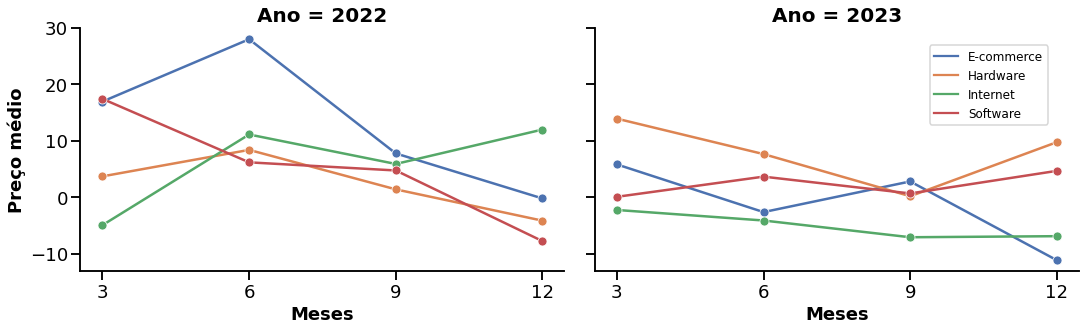

In [36]:
# Plot do gráfico de linha com SEABORN

plt.figure(figsize=(12, 6))

fig1 = sns.relplot(kind = 'line',
                   data = media_crescimento_preco,
                   y = 'mean', 
                   x = meses,
                   hue = setores,
                   col = anos, 
                   col_wrap = 2,
                   marker = 'o',
                   linewidth = 2.5,
                   height = 5,
                   aspect = 1.3,
                   palette = 'deep')

fig1._legend.remove()   # Remove a legenda padrão
fig1.set_titles(size=20, fontweight='bold')
fig1.set_axis_labels('Meses', 'Preço médio', fontsize = 18, fontweight = 'bold')

sns.set_context("talk", font_scale=1.1)

for ax in fig1.axes.flat:
    ax.set_xticks(np.arange(3, 13, 3))
    ax.set_yticks(np.arange(-10, 31, 10))
    
# Adiciona uma legenda única ao gráfico inteiro (fora dos subplots)
fig1.fig.legend(loc='upper center', 
                bbox_to_anchor=(0.9, 0.85),
                ncol=1,
                fontsize=12,
                title_fontsize=12)

fig1.fig.tight_layout()
plt.show()

**Figura 5**: Evolução trimestral do preço médio das ações por setor, calculado como a diferença entre o preço de fechamento e o preço de abertura. Valores positivos indicam setores com valorização média, enquanto valores negativos sugerem desvalorização das ações no período analisado.

## 5. Quais empresas aumentaram sua receita trimestre a trimestre?

In [37]:
receita_trimestral = df.groupby(['Ano', 'Mês', 'Empresa'])['Receita (USD)'].agg([np.mean, np.sum, np.median])

In [38]:
# Extração dos níveis para o gráfico

anos = receita_trimestral.index.get_level_values(0)
meses = receita_trimestral.index.get_level_values(1)
empresas = receita_trimestral.index.get_level_values(2)

<Figure size 1008x504 with 0 Axes>

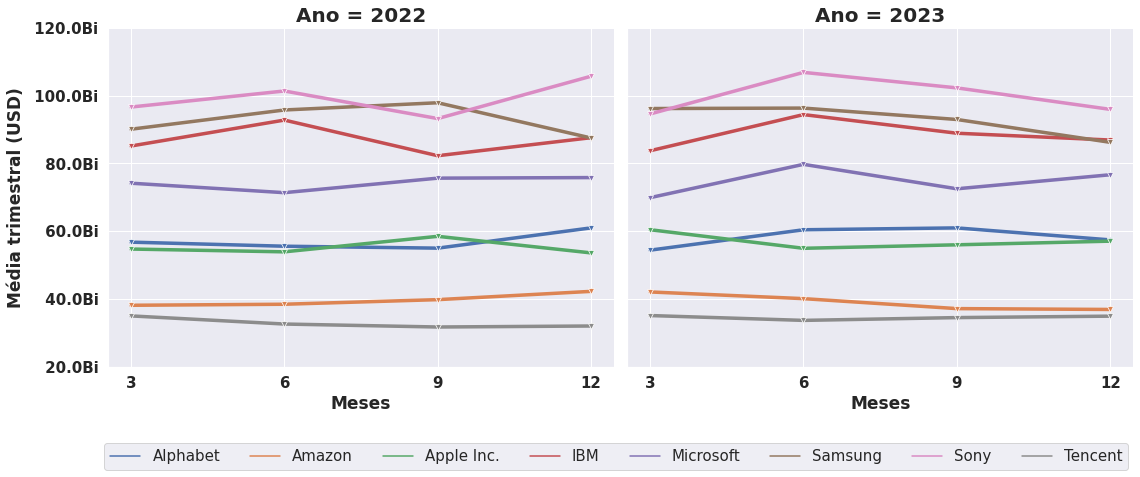

In [39]:
sns.set()

plt.figure(figsize=(14, 7))  # Tamanho da figura

# Gráfico com o método realplot
fig2 = sns.relplot(kind = 'line', 
                   data = receita_trimestral,
                   y = 'mean', 
                   x = meses, 
                   hue = empresas, 
                   col = anos, 
                   col_wrap = 2, 
                   marker = 'v', 
                   linewidth = 3.5, 
                   height = 5,
                   aspect = 1.5,
                   palette = 'deep')

fig2._legend.remove()
fig2.set_titles(fontsize = 24, fontweight = 'bold')
fig2.set_axis_labels('Meses', 'Média trimestral (USD)', fontsize = 17, fontweight = 'bold')

for ax in fig2.axes.flat:
    ax.set_title(ax.get_title(), fontsize=20, fontweight='bold')
    
    ax.set_xticks(np.arange(3, 13, 3))
    
    # Ticks originais
    yticks = np.arange(20_000_000_000, 120_000_000_001, 20_000_000_000)
    
    # Aplica a função em cada tick
    tickFormatado = [FormataValor(t) for t in yticks]
    
    # Aplica os rótulos formatados
    ax.set_yticks(yticks)
    ax.set_yticklabels(tickFormatado, fontsize=15, fontweight='bold')

fig2.set_xticklabels(fontsize = 15, fontweight = 'bold')

    
# Adiciona legenda fora dos subplots
fig2.fig.legend(loc = 'center', 
                bbox_to_anchor=(0.54, -0.07), 
                ncol=8, 
                fontsize=15, 
                title_fontsize=15)


fig2.fig.set_size_inches(16, 6)
fig2.fig.subplots_adjust(top = 0.9, bottom = 0.15, wspace = 0.3, hspace = 0.2)

plt.tight_layout()
plt.show()


In [40]:
pd.set_option('display.max_columns', None)
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%),Media de Crescimento Preço,Mês,Ano
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,58328554,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204,-0.971014,3,2022
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96684345,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429,5.163301,6,2022
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96861808,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818,-13.357770,9,2022
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,82687329,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755,-7.391408,12,2022
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,18092016,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559,20.274029,3,2023


## 6. Gráfico de linha com a evolução do lucro líquido das 3 maiores empresas em valor de mercado.

In [41]:
# Encontra as 3 empresas com maior valor de mercado por meio do ÍNDICE no data frame
top3_empresas = df.groupby('Empresa')['Valor de Mercado (USD)'].sum().sort_values(ascending = False).head(3).index

# Filtra as informações do DataFrame apenas para essas empresas
# retorna uma série booleana: True para as linhas do df onde a empresa está dentro da lista top3_empresas,
# e False para as demais --> isin() "está em"
df_top3 = df[df['Empresa'].isin(top3_empresas)]

# Agrupa para análise da evolução do lucro líquido ao longo do tempo
evolucao_lucro = df_top3.groupby(['Ano', 'Mês', 'Empresa'])['Lucro Líquido (USD)'].sum().reset_index()

<Figure size 864x432 with 0 Axes>

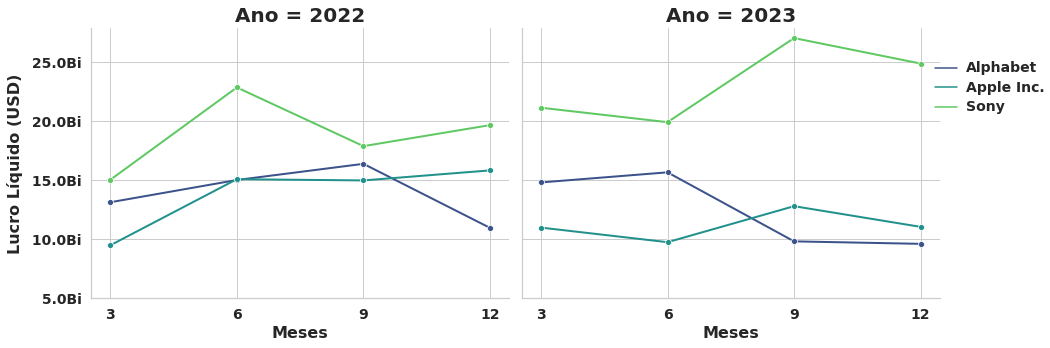

In [42]:
# Plot do gráfico de linha

sns.set()
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

fig6 = sns.relplot(kind = 'line', 
                   data = evolucao_lucro, 
                   x = 'Mês',
                   y = 'Lucro Líquido (USD)',
                   hue = 'Empresa',
                   col = 'Ano', 
                   marker = 'o', 
                   linewidth = 2, 
                   height = 5, 
                   aspect = 1.2,
                   palette = 'viridis')

# Formata os eixos com a função formatadora
for ax in fig6.axes.flat:
    yticks = np.arange(5_000_000_000, 30_000_000_000, 5_000_000_000)
    xticks = np.arange(3, 13, 3)
    ax.set_yticks(yticks)
    ax.set_xticks(xticks)
    ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 14, fontweight = 'bold')
    ax.set_xticklabels(xticks, fontsize = 14, fontweight = 'bold')    
    
fig6.set_axis_labels('Meses', 'Lucro Líquido (USD)', fontsize = 16, fontweight = 'bold')
fig6.set_titles(size = 20, fontweight = 'bold')

# Configuração da caixa de legenda
fig6._legend.set_title(" ")
for text in fig6._legend.texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

# Posição da caixa de legenda
fig6._legend.set_bbox_to_anchor((1.1, 0.75))  # (x, y): centralizado acima do gráfico

plt.tight_layout()
plt.show()

**Figura 6**: Evolução do lucro líquido das 3 maiores empresas em valor de mercado. O gráfico mostra a variação trimestral do lucro líquido (em bilhões de dólares) ao longo dos anos. O gráfico compara o desempenho financeiro entre as líderes de mercado em diferentes períodos.

## 7. Há correlação entre o volume negociado e o lucro trimestral?

In [43]:
df_grouped = df.groupby(['Ano', 'Mês', 'Empresa'])[['Volume Negociado', 'Lucro Líquido (USD)']].sum().reset_index()

x = df_grouped['Volume Negociado']
y = df_grouped['Lucro Líquido (USD)']

filtrar_volume_e_lucro = np.corrcoef(x, y)[0, 1]

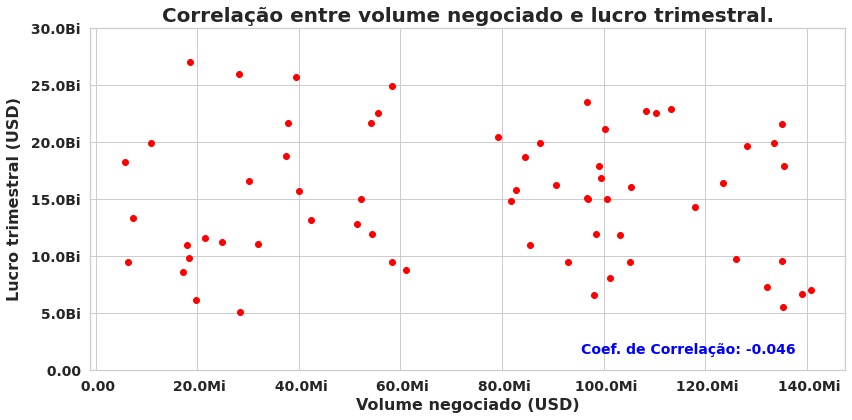

In [44]:
# Scatter plot com Matplotlib
fig7, ax = plt.subplots(figsize=(12, 6))

plt.scatter(x, y, color = 'red')
plt.annotate(f'Coef. de Correlação: {filtrar_volume_e_lucro:.3f}', xy=(0.65, 0.05), xycoords='axes fraction',
             fontsize=14, fontweight='bold', color='blue')

plt.title('Correlação entre volume negociado e lucro trimestral.', fontsize=20, fontweight = 'bold')
plt.xlabel('Volume negociado (USD)', fontsize = 16, fontweight = 'bold')
plt.ylabel('Lucro trimestral (USD)', fontsize = 16, fontweight = 'bold')

# Formatando os ticks dos eixos
xticks = np.arange(0, 160_000_000, 20_000_000) 
yticks = ax.get_yticks()
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels([FormataValor(x) for x in xticks], fontsize = 14, fontweight = 'bold')
ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 14, fontweight = 'bold')

plt.tight_layout()
plt.show()

**Figura 7**: Análise de correlação entre o volume de negociações e o lucro líquido trimestral das empresas. O gráfico de dispersão mostra a relação entre essas duas variáveis para cada empresa em diferentes trimestres. A correlação de -0.05 entre volume negociado e lucro trimestral indica que não há relação linear significativa entre essas variáveis no conjunto de dados analisado. Isso sugere que o comportamento do volume de negociações não está diretamente associado ao lucro líquido das empresas neste período.

## 8. Qual a relação entre o valor de mercado e o lucro líquido?

In [45]:
# Agrupa as empresas pela SOMA do valor do ÚLTIMO trimestre e a média de seus respectivos valores de Mercado
df_p8 = df.groupby('Empresa').agg({'Valor de Mercado (USD)': 'mean', 
                                   'Lucro Líquido (USD)': 'last'}    # 'last' o útilmo valor do período
                                 ).reset_index()
xEixo = df['Valor de Mercado (USD)']
yEixo = df['Lucro Líquido (USD)']

df_p8_corr = np.corrcoef(xEixo, yEixo)[0, 1]
df_p8_corr

0.06660982311452165

<Figure size 1512x576 with 0 Axes>

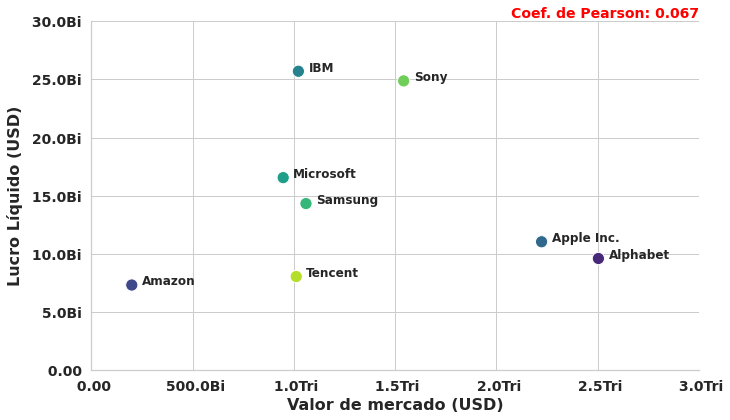

In [46]:
# Plot em scatter plot com Seaborn

# Dimensões da figura
plt.figure(figsize=(21, 8))

# Configurações do gráfico; dados: df_p8; estética: eixos x, y; geometria: linha; Facetas: relplot 
fig8 = sns.relplot(kind = 'scatter', data = df_p8, 
                   x = df_p8['Valor de Mercado (USD)'], 
                   y = df_p8['Lucro Líquido (USD)'],
                   hue = 'Empresa',
                   marker = 'o', 
                   height = 6, 
                   aspect = 1.5, 
                   palette = 'viridis',
                   s = 150)

# Configurações dos ticks
for ax in fig8.axes.flat:
    xticks = ax.get_xticks()
    yticks = np.arange(0, 30_000_000_001, 5_000_000_000)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([FormataValor(x) for x in xticks], fontsize = 14, fontweight = 'bold')
    ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 14, fontweight = 'bold')

# Loop que coloca o nome da empresa nos pontos do gráfico
for i, row in df_p8.iterrows():
    plt.text(row['Valor de Mercado (USD)']+50_000_000_000, 
             row['Lucro Líquido (USD)'], 
             row['Empresa'], 
             fontsize=12, 
             fontweight = 'bold')
    
# Coloca o valor da correlação entre o valor de mercado e o lucro líquido
plt.annotate(f'Coef. de Pearson: {df_p8_corr:.3f}', 
             xy = (0.69, 1.01), 
             xycoords = 'axes fraction', 
             fontsize = 14, 
             fontweight = 'bold', 
             color = 'red')

# Configurações dos labels
fig8.set_axis_labels('Valor de mercado (USD)', 'Lucro Líquido (USD)',fontsize = 16, fontweight = 'bold')

fig8._legend.remove()
plt.tight_layout()
plt.show()

**Figura 8**: Relação entre o valor de mercado e o lucro líquido das empresas do setor de tecnologia. A figura mostra que não há relação linear direta entre o valor de mercado e o lucro líquido das empresas analisadas (r = 0.067). Essa ausência de correlação indica que o valor de mercado dessas empresas é influenciado por fatores que vão além do desempenho financeiro trimestral, como inovação, expectativas futuras e percepção de marca.

## 9. Quais empresas têm o maior índice de endividamento (Dívida / Receita)?

In [47]:
df['Índice de Endividamento'] = df['Dívida (USD)'] / df['Receita (USD)']
endividamento_empresas = df.groupby('Empresa')['Índice de Endividamento'].mean().sort_values(ascending = False).reset_index()

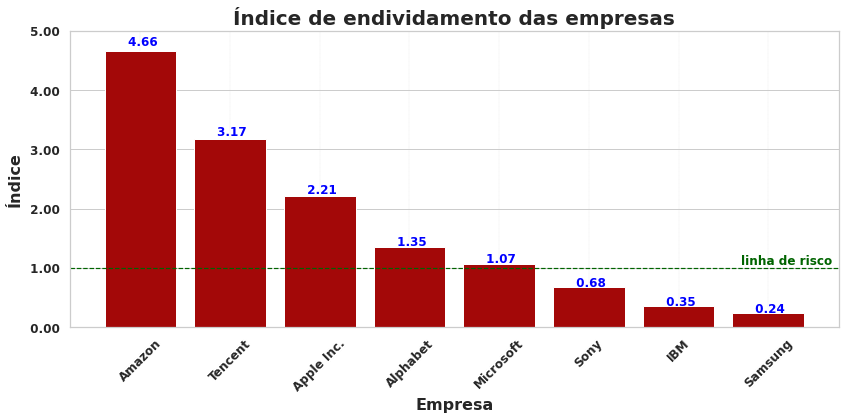

In [48]:
# Gráfico de barras

eixoX = endividamento_empresas['Empresa']
eixoY = endividamento_empresas['Índice de Endividamento']

fig9, ax = plt.subplots(figsize=(12, 6))
plt.bar(eixoX, eixoY, color = '#a30808')

# Set do título, labels e grid
plt.title('Índice de endividamento das empresas', fontsize = 20, fontweight = 'bold')
plt.xlabel('Empresa', fontsize = 16, fontweight = 'bold' )
plt.ylabel('Índice', fontsize = 16, fontweight = 'bold' )
plt.grid(True, linestyle = '--', linewidth = 0.25, alpha = 0.8, axis = 'x')

# Adicionando valores ao topo de cada barra
for i, valor in enumerate(eixoY):
    ax.text(x = i, 
            y = valor + valor*0.02, 
            s = FormataValor(valor), 
            ha = 'center', 
            fontsize = 12, 
            fontweight = 'bold', 
            color = 'blue')
    
# Formatando os ticks dos eixos
yticks = np.arange(0, 5.1, 1) 
ax.set_yticks(yticks)
ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 12, fontweight = 'bold')

# Traça uma linha de corte que representa uma linha de risco
plt.axhline(1.0, color = 'darkgreen', linestyle = '--', linewidth = 1.2)
plt.text(6.7, 1.05, 'linha de risco', fontsize = 12, color = 'darkgreen', fontweight = 'bold')

plt.xticks(rotation = 45,  fontsize = 12, fontweight = 'bold')

plt.tight_layout()
plt.show()


**Figura 9**: Índice médio de endividamento (Dívida / Receita) das principais empresas do setor de tecnologia. O gráfico mostra a razão entre a dívida total e a receita gerada, em média, ao longo do período analisado. O índice indica o grau de alavancagem da empresa, indicando uma possível dependência de capital externo para financiar suas operações. A linha de risco separa as empresas que possivelmente operam alavancadas.

## 10. Quais empresas têm maior retorno de dividendos em relação ao preço médio da ação?

In [49]:
df['Dividend Yeld'] = (df['Dividendos por Ação'] / df['Preço Médio'])*100

retorno_dividendo = df.groupby('Empresa')['Dividend Yeld'].mean().sort_values().reset_index()
retorno_dividendo['Dividend Yeld'] = retorno_dividendo['Dividend Yeld'].round(3)
retorno_dividendo

,Empresa,Dividend Yeld
0,Amazon,0.242
1,IBM,0.566
2,Apple Inc.,0.641
3,Tencent,0.778
4,Alphabet,0.807
5,Samsung,0.829
6,Sony,1.024
7,Microsoft,1.093


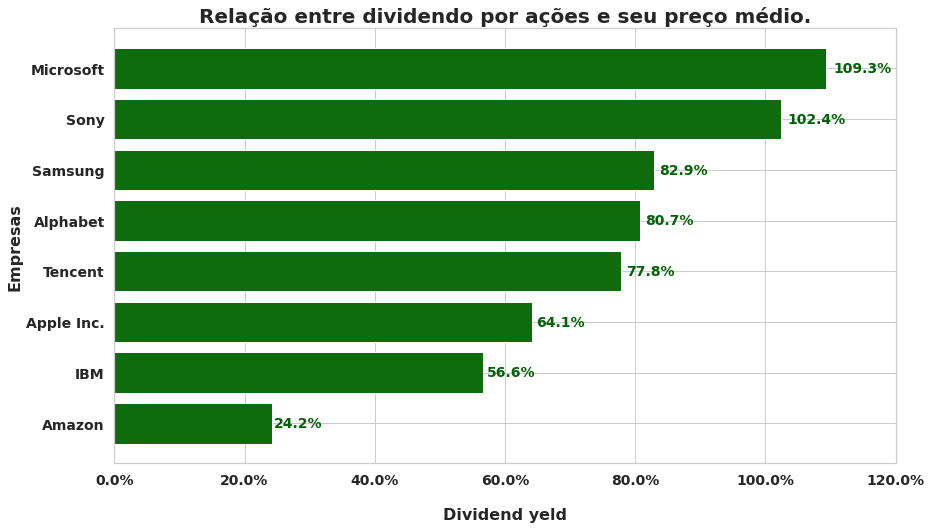

In [50]:
eixoX = retorno_dividendo['Empresa']
eixoY = retorno_dividendo['Dividend Yeld']

# Plot fo gráfico de barras horizontais
fig10, ax = plt.subplots(figsize = (14, 8))

# Gráfico de barras horizontais
ax.barh(eixoX, eixoY, color = '#0e6b0e')

# Título do gráfico e dos labels
plt.title('Relação entre dividendo por ações e seu preço médio.', fontsize = 20, fontweight = 'bold')
plt.xlabel('Dividend yeld', fontsize = 16, fontweight = 'bold', labelpad = 20)
plt.ylabel('Empresas', fontsize = 16, fontweight = 'bold')

# Adiciona os valores no topo de cada barra
for i, valor in enumerate(eixoY):
    ax.text(x = valor + valor*0.01, 
            y = i, 
            s = f"{valor*100:.1f}%", 
            ha = 'left', 
            va = 'center',
            fontsize = 14, 
            fontweight = 'bold', 
            color = '#036106')

# Formatando os ticks do eixo x
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:.1f}%'))
ax.set_xlim(0, 1.2)
ax.set_xticks(np.arange(0, 1.3, 0.2))
ax.tick_params(axis = 'x', labelsize = 14, labelrotation = 0, width = 1)
plt.xticks(fontweight = 'bold')

yticks = ax.get_yticks()
plt.yticks(yticks, fontsize = 14, fontweight = 'bold')


plt.show()

**Figura 10**: Relação entre o dividendo pago por ação e o preço médio das ações das principais empresas de tecnologia. O gráfico apresenta o chamado dividend yield, ou seja, a razão entre o dividendo distribuído e o preço médio da ação ao longo do período. Empresas com dividend yields mais altos proporcionam maior retorno proporcional ao investidor em forma de dividendos, independentemente da valorização das ações. Microsoft e Sony destacam-se com os maiores índices de retorno de dividendos, enquanto Amazon e IBM aparecem com os menores. Essa métrica é amplamente utilizada avaliação de ações voltadas a estratégias de renda passiva.

## 11. Compare o desempenho de empresas americanas vs não-americanas em termos de lucro e margem.

In [51]:
# Criando uma nova coluna com o país de origem da empresa

df['Origem'] = df['País'].apply(lambda p: 'EUA' if p == 'Estados Unidos' else 'Outros')

empresas = df.groupby('Origem')[['Lucro Líquido (USD)', 'Margem (%)']].agg('mean').reset_index()
empresas

,Origem,Lucro Líquido (USD),Margem (%)
0,EUA,1.435265e+10,22.809434
1,Outros,1.630494e+10,21.666476


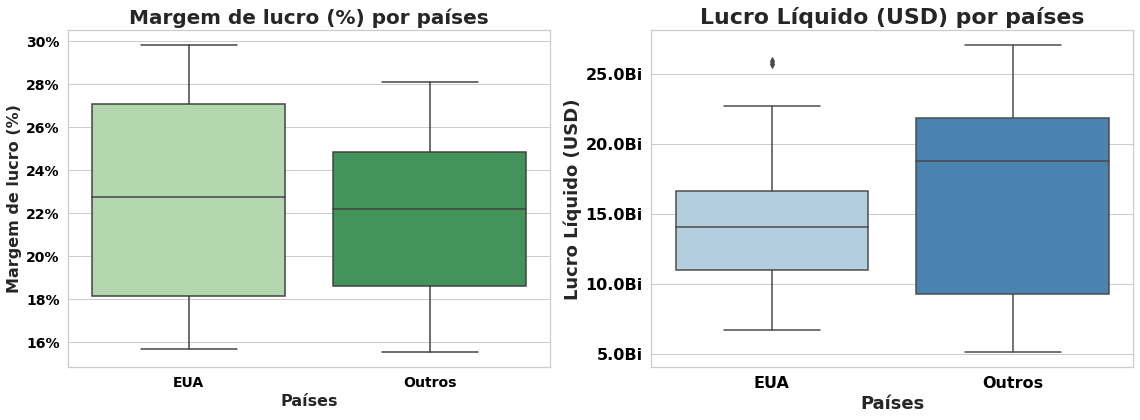

In [52]:
# Plot do gráfico com Seaborn

sns.set(style = 'whitegrid')

# Cria uma linha com duas colunas de gráficos
fig11, axs = plt.subplots(1, 2, figsize = (16, 6), sharex = False)

# Primeiro boxplot
sns.boxplot(data = df, x = 'Origem', y = 'Margem (%)', palette = 'Greens', ax = axs[0])
axs[0].set_title('Margem de lucro (%) por países', fontsize = 20, fontweight = 'bold')
axs[0].set_xlabel('Países', fontsize = 16, fontweight = 'bold')
axs[0].set_ylabel('Margem de lucro (%)', fontsize = 16, fontweight = 'bold')
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontweight = 'bold')

# Configuração do eixo y
for label in axs[0].get_yticklabels(): label.set_fontweight('bold')

#Ticks do boxplot 1
axs[0].tick_params(axis = 'x', labelsize = 14, labelcolor = 'black', width = 1, length = 5)
axs[0].tick_params(axis = 'y', labelsize = 14, labelcolor = 'black', width = 1, length = 5)

# Segundo boxplot
sns.boxplot(data = df, x = 'Origem', y = 'Lucro Líquido (USD)', palette = 'Blues', ax = axs[1])
axs[1].set_title('Lucro Líquido (USD) por países', fontsize = 22, fontweight = 'bold')
axs[1].set_xlabel('Países', fontsize = 18, fontweight = 'bold')
axs[1].set_ylabel('Lucro Líquido (USD)', fontsize = 18, fontweight = 'bold')
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e9:.1f}Bi'))
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontweight = 'bold')

# Configuração do eixo y
for label in axs[1].get_yticklabels(): label.set_fontweight('bold')

#Ticks do boxplot 1
axs[1].tick_params(axis = 'x', labelsize = 16, labelcolor = 'black', width = 1, length = 5)
axs[1].tick_params(axis = 'y', labelsize = 16, labelcolor = 'black', width = 1, length = 5)

plt.tight_layout()
plt.show()

**Figura 11**: Boxplot comparativo entre empresas dos Estados Unidos e de outros países em relação à margem de lucro (%) e ao lucro líquido trimestral. Observa-se que as empresas americanas apresentam margens mais concentradas, enquanto empresas de fora dos EUA têm maior variação nos lucros, incluindo outliers de alto desempenho. Essa análise evidencia a diversidade dos modelos de negócio e contextos econômicos em diferentes regiões.

## 12. Qual a distribuição do P/L entre os setores (gráfico de boxplot por setor)?

In [53]:
df_p12 = df.groupby('Setor')['P/L'].mean().sort_values(ascending = False).index
df_p12

Index(['E-commerce', 'Internet', 'Hardware', 'Software'], dtype='object', name='Setor')

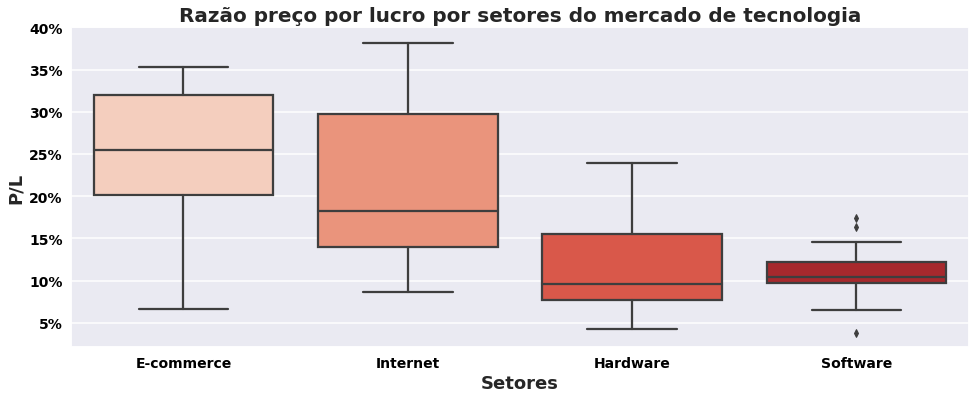

In [54]:
# Plot do gráfico com Seaborn

sns.set()

sns.set_context("talk", font_scale=1.2)

# Cria uma linha com duas colunas de gráficos
fig12, ax = plt.subplots(figsize = (14, 6))

# Primeiro boxplot
sns.boxplot(data = df, x = 'Setor', y = 'P/L', order = df_p12, palette = 'Reds')

# Labels e ticks
ax.set_title('Razão preço por lucro por setores do mercado de tecnologia', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Setores', fontsize = 18, fontweight = 'bold')
ax.set_ylabel('P/L', fontsize = 18, fontweight = 'bold')

yticks = np.arange(5, 41, 5)
ax.set_yticks(yticks)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax.set_xticklabels(ax.get_xticklabels(), fontweight = 'bold')

# Configuração do eixo y
for label in ax.get_yticklabels(): label.set_fontweight('bold')

#Ticks do boxplot 1
ax.tick_params(axis = 'x', labelsize = 14, labelcolor = 'black', width = 1, length = 5)
ax.tick_params(axis = 'y', labelsize = 14, labelcolor = 'black', width = 1, length = 5)

plt.tight_layout()
plt.show()

**Figura 12**: Distribuição da razão preço por lucro (P/L) entre os setores de tecnologia. O setor de E-commerce apresenta os maiores valores medianos de P/L, indicando maior expectativa de crescimento ou precificação mais agressiva do mercado. O setor de Software tem a menor dispersão, sugerindo empresas com valuation mais alinhado. Internet apresenta a maior variabilidade de P/L, refletindo diversidade nos modelos de negócio.

## 13. Quais ações apresentaram maior volatilidade nos preços de fechamento ao longo do período analisado?

In [55]:
pd.set_option('display.max_columns', None)
df.head()

,Empresa,Ticker,Data,Receita (USD),Lucro Líquido (USD),Margem (%),Setor,País,Valor de Mercado (USD),Dívida (USD),Volume Negociado,Preço Abertura,Preço Fechamento,Dividendos por Ação,Preço Médio,P/L,EBITDA Estimado (USD),Margem EBITDA (%),Media de Crescimento Preço,Mês,Ano,Índice de Endividamento,Dividend Yeld,Origem
0,Apple Inc.,AAPL,2022-03-31,5.472257e+10,9.488849e+09,17.339918,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,58328554,138.344521,137.373507,1.680865,137.859014,13.143388,3.351003e+10,61.236204,-0.971014,3,2022,2.261318,1.219264,EUA
1,Apple Inc.,AAPL,2022-06-30,5.389672e+10,1.508712e+10,27.992642,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96684345,133.677722,138.841022,0.491043,136.259372,8.470094,4.232047e+10,78.521429,5.163301,6,2022,2.295967,0.360373,EUA
2,Apple Inc.,AAPL,2022-09-30,5.847592e+10,1.498217e+10,25.621089,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,96861808,294.062322,280.704552,0.269365,287.383437,17.981505,4.207917e+10,71.959818,-13.357770,9,2022,2.116172,0.093730,EUA
3,Apple Inc.,AAPL,2022-12-31,5.358050e+10,1.583231e+10,29.548648,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,82687329,166.481499,159.090092,1.641806,162.785796,9.671029,3.641318e+10,67.959755,-7.391408,12,2022,2.309518,1.008569,EUA
4,Apple Inc.,AAPL,2023-03-31,6.042663e+10,1.098864e+10,18.185087,Hardware,Estados Unidos,2.222782e+12,1.237451e+11,18092016,276.250242,296.524271,0.163627,286.387256,23.888228,3.304162e+10,54.680559,20.274029,3,2023,2.047857,0.057135,EUA


In [56]:
df_p13 = df[df['Mês'] == 3]

In [57]:
volatilidade_ano = df.groupby('Empresa')['Preço Fechamento'].std().sort_values(ascending=False).reset_index()
volatilidade_ano

,Empresa,Preço Fechamento
0,Amazon,83.545954
1,Samsung,76.881463
2,Alphabet,68.179391
3,Apple Inc.,62.187516
4,Sony,62.008972
5,Microsoft,55.468328
6,Tencent,49.491253
7,IBM,41.375989


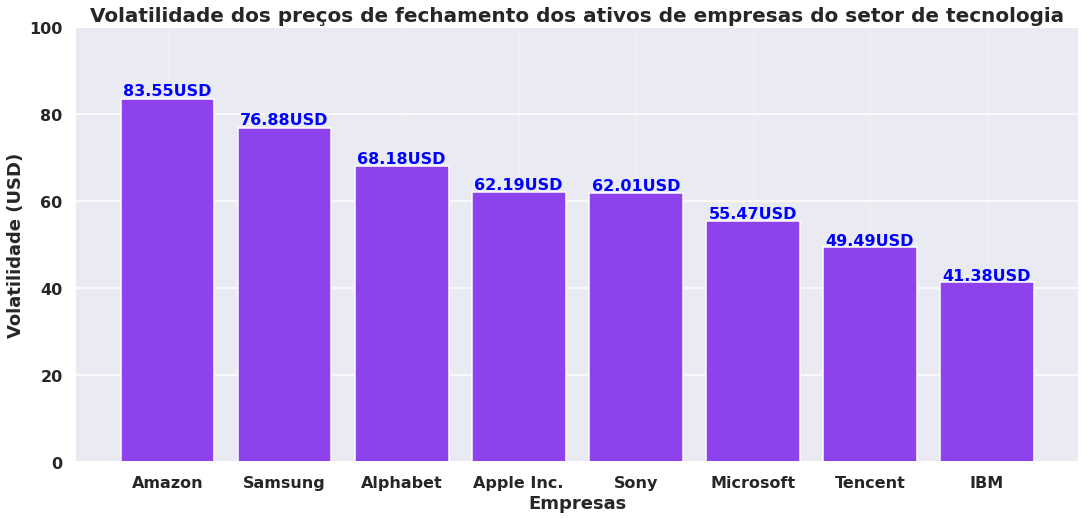

In [60]:
# Plot do gráfico

fig13, ax = plt.subplots(figsize = (18, 8))

eixoX = volatilidade_ano['Empresa']
eixoY = volatilidade_ano['Preço Fechamento']

ax.bar(eixoX, eixoY, color = '#8e42eb')

# Labels do gráfico
plt.title('Volatilidade dos preços de fechamento dos ativos de empresas do setor de tecnologia', 
          fontsize = 20, 
          fontweight = 'bold'
         )
plt.xlabel('Empresas', 
           fontsize = 18, 
           fontweight = 'bold'
          )
plt.ylabel('Volatilidade (USD)', 
           fontsize = 18, 
           fontweight = 'bold'
          )

plt.grid(True, linestyle = '--', 
         linewidth = 0.5, 
         alpha = 0.8, 
         axis = 'x')

# Adiocionando valores ao topo das barras
for i, valor in enumerate(eixoY):
    ax.text(x = i, 
            y = valor + valor*0.01, 
            s = f'{valor:.2f}USD', 
            ha = 'center', 
            fontsize = 16, 
            fontweight = 'bold', 
            color = 'blue')

# Formatando os ticks do eixo y

yticks = np.arange(0, 101, 20)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 16, fontweight = 'bold')

ay.set_ylim(0, 1_000_000_000_000)  # Limite de 1 tri
ticks = np.arange(0, 1_000_000_000_000 + 1, 200_000_000_000)  # De 200 em 200 bi
ay.set_yticks(ticks)    # Configura os valores do eixo y de acordo com a lista 'ticks'
ay.set_yticklabels([FormataValor(t) for t in ticks], 
                   fontsize=12, 
                   fontweight='bold')   

plt.show()

## 14. Destaque das empresas mais atrativas com base em alto lucro e baixo P/L.

In [61]:
df_p14 = df.groupby('Empresa')[['Lucro Líquido (USD)', 'P/L']].mean().sort_values(by = 'P/L', ascending=True).reset_index()
df_p14

,Empresa,Lucro Líquido (USD),P/L
0,Sony,2.105198e+10,8.218035
1,Samsung,2.049059e+10,10.025738
2,Microsoft,1.647814e+10,10.235649
3,IBM,2.035128e+10,11.444367
4,Alphabet,1.317726e+10,14.499164
5,Apple Inc.,1.249785e+10,15.971162
6,Amazon,9.258745e+09,24.292354
7,Tencent,7.372266e+09,28.531338


In [62]:
x = df_p14['P/L']
y = df_p14['Lucro Líquido (USD)']
corr = np.corrcoef(x, y)[0, 1]
corr

-0.9265244829303788

<Figure size 1512x432 with 0 Axes>

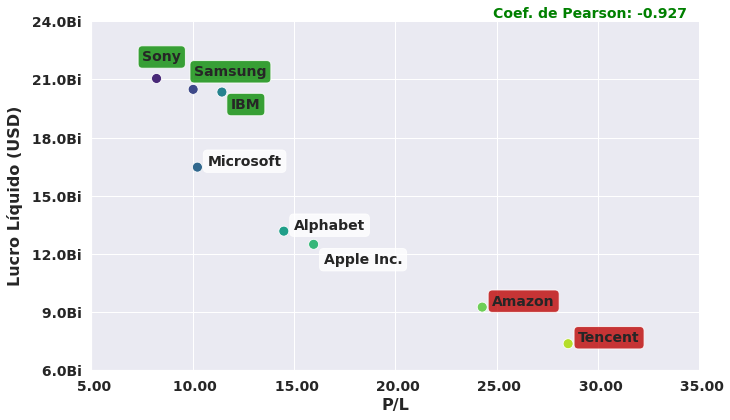

In [63]:
# Dimensões da figura
plt.figure(figsize=(21, 6))

sns.set()
# Configurações do gráfico
fig14 = sns.relplot(kind = 'scatter', 
                    data = df_p14, 
                    x = df_p14['P/L'], 
                    y = df_p14['Lucro Líquido (USD)'], 
                    hue = 'Empresa', 
                    marker = 'o', 
                    height = 6, 
                    aspect = 1.5,  
                    alpha = 1.0,
                    palette = 'viridis', 
                    s = 100)

# Configurações dos ticks
for ax in fig14.axes.flat:
    xticks = np.arange(5, 36, 5)   # ax.get_xticks()
    yticks = np.arange(6_000_000_000, 25_000_000_000, 3_000_000_000)   # ax.get_yticks()
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([FormataValor(x) for x in xticks], fontsize = 14, fontweight = 'bold')
    ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 14, fontweight = 'bold')


# Loop que coloca o nome da empresa nos pontos do gráfico
for i, row in df_p14.iterrows():
    xOffSet = 0.5
    yOffSet = 100_000_000
    limiarPLbaixo = 12.50 #df_p14['P/L'].median()
    limiarPLalto = 24.00
    limiarLucroAlto = 19_000_000_000 # df_p14['Lucro Líquido (USD)'].median()
    limiarLucroBaixo = 10_000_000_000
    
    
    if row['Empresa'] == 'IBM':
        xOffSet = 0.45
        yOffSet = -850_000_000
    elif row['Empresa'] == 'Sony':
        xOffSet = -0.7
        yOffSet = 900_000_000
    elif row['Empresa'] == 'Samsung':
        xOffSet = 0.05
        yOffSet = 700_000_000
    elif row['Empresa'] == 'Apple Inc.': 
        xOffSet = xOffSet
        yOffSet = -1_000_000_000
    
    if row['P/L'] < limiarPLbaixo and row['Lucro Líquido (USD)'] > limiarLucroAlto:
        corFundo = '#0a8c06'
    elif row['P/L'] > limiarPLalto and row['Lucro Líquido (USD)'] < limiarLucroBaixo:
        corFundo = '#bd0606'
    else:
        corFundo = 'white'
    
    plt.text(row['P/L'] + xOffSet, 
             row['Lucro Líquido (USD)'] + yOffSet, 
             row['Empresa'],
             fontsize = 14, 
             fontweight = 'bold', 
             bbox = dict(facecolor = corFundo, alpha = 0.8, boxstyle = 'round, pad = 0.3'))

# Coloca o valor da correlação entre o valor de mercado e o lucro líquido
plt.annotate(f'Coef. de Pearson: {corr:.3f}', 
             xy = (0.66, 1.01), 
             xycoords = 'axes fraction', 
             fontsize = 14, 
             fontweight = 'bold', 
             color = 'green')

# Configurações dos labels
fig14.set_axis_labels('P/L', 'Lucro Líquido (USD)', fontsize = 16, fontweight = 'bold')

# Configuração da caixa de legenda
#fig14._legend.set_title(" ")
#for text in fig14._legend.texts:
#    text.set_fontsize(14)
#    text.set_fontweight('bold')

# Posição da caixa de legenda
#fig14._legend.set_bbox_to_anchor((1.1, 0.75))  # (x, y): centralizado acima do gráfico

fig14._legend.remove()
plt.tight_layout()
plt.show()

**Figura 14**: Gráfico de dispersão entre o índice P/L (preço por lucro) e o lucro líquido médio das principais empresas do setor de tecnologia. Cada ponto representa uma empresa, posicionada de acordo com o seu lucro líquido médio no eixo vertical e o seu P/L médio no eixo horizontal. As empresas e foram destacadas com cores diferentes conforme critérios de atratividade: verde são empresas consideradas mais atrativas, com baixo  P/L  (ações relativamente baratas) e  lucro  líquido  elevado; vermelho são empresas consideradas menos atrativas, com P/L alto (ações potencialmente supervalorizadas) e lucro líquido mais baixo; em branco as empresas com  desempenho intermediário ou fora das faixas extremas. O  valor  do  coeficiente  de correlação de Pearson (ρ ≈ -0.927) sugere uma forte correlação negativa entre lucro líquido e P/L, ou seja, quanto maior o lucro, menor tende a ser o P/L, reforçando a atratividade de empresas como Sony, Samsung e IBM, e alertando para potenciais superavaliações em empresas como Amazon e Tencent.

## 15. Quais empresas apresentam alta margem EBITDA combinada com baixo P/L, e como isso pode indicar oportunidades de investimento subvalorizadas?

In [64]:
df_p16 = df.groupby('Empresa')[['Margem EBITDA (%)', 'P/L']].mean().sort_values(by = 'P/L', 
                                                                                ascending = False).reset_index()
df_p16

,Empresa,Margem EBITDA (%),P/L
0,Tencent,62.427520,28.531338
1,Amazon,61.107598,24.292354
2,Apple Inc.,64.595674,15.971162
3,Alphabet,62.645330,14.499164
4,IBM,71.863935,11.444367
5,Microsoft,63.911349,10.235649
6,Samsung,66.179892,10.025738
7,Sony,59.377063,8.218035


In [65]:
x = df_p16['P/L']
y = df_p16['Margem EBITDA (%)']
corr = np.corrcoef(x, y)[0, 1]
corr

-0.2771664021868251

<Figure size 1512x432 with 0 Axes>

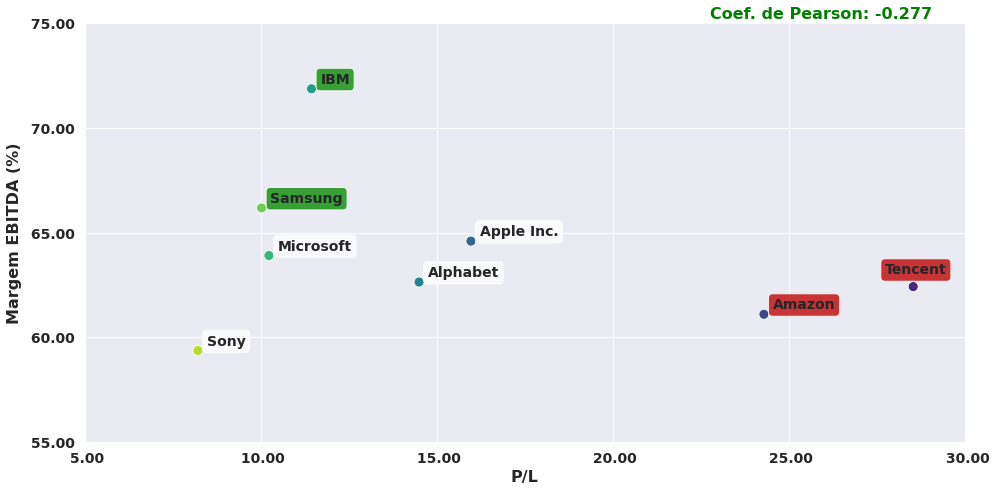

In [66]:
# Plot do gráfico do Seaborn

# Dimensões da figura
plt.figure(figsize=(21, 6))

sns.set()
# Configurações do gráfico
fig16 = sns.relplot(kind = 'scatter', 
                    data = df_p16, 
                    x = df_p16['P/L'], 
                    y = df_p16['Margem EBITDA (%)'], 
                    hue = 'Empresa', 
                    marker = 'o', 
                    height = 6, 
                    aspect = 1.5,  
                    alpha = 1.0,
                    palette = 'viridis', 
                    s = 100)

# Configurações dos ticks
for ax in fig16.axes.flat:
    xticks = np.arange(5, 31, 5) # ax.get_xticks()
    yticks = np.arange(55, 76, 5) # ax.get_yticks()
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels([FormataValor(x) for x in xticks], fontsize = 14, fontweight = 'bold')
    ax.set_yticklabels([FormataValor(y) for y in yticks], fontsize = 14, fontweight = 'bold')


# Loop que coloca o nome da empresa nos pontos do gráfico

for i, row in df_p16.iterrows():
    xOffSet = 0.25
    yOffSet = 0.25
    limiarPLbaixo = 12.50 #df_p14['P/L'].median()
    limiarPLalto = 24.00
    limiarEbitda = 65.00 # df_p14['Lucro Líquido (USD)'].median()
    
    
    if row['Empresa'] == 'Tencent':
        xOffSet = -0.80
        yOffSet = 0.6

    if row['P/L'] < limiarPLbaixo and row['Margem EBITDA (%)'] > limiarEbitda:
        corFundo = '#0a8c06'
    elif row['P/L'] > limiarPLalto and row['Margem EBITDA (%)'] < limiarEbitda:
        corFundo = '#bd0606'
    else:
        corFundo = 'white'
    
    plt.text(row['P/L'] + xOffSet, 
             row['Margem EBITDA (%)'] + yOffSet, 
             row['Empresa'],
             fontsize = 14, 
             fontweight = 'bold', 
             bbox = dict(facecolor = corFundo, alpha = 0.8, boxstyle = 'round, pad = 0.3'))

# Coloca o valor da correlação entre o valor de mercado e o lucro líquido
plt.annotate(f'Coef. de Pearson: {corr:.3f}', 
             xy = (0.71, 1.01), 
             xycoords = 'axes fraction', 
             fontsize = 16, 
             fontweight = 'bold', 
             color = 'green')

# Configurações dos labels
fig16.set_axis_labels('P/L', 'Margem EBITDA (%)', fontsize = 16, fontweight = 'bold')
fig16.fig.set_size_inches(14, 7)

# Configura posição e estilo da legenda
fig16._legend.set_bbox_to_anchor((1.0, 0.95))  # (x, y): centralizado acima do gráfico
#fig16._legend.set_loc("upper center")          # Ancoragem no topo central
#fig16._legend._legend_box.align = "center"     # Centraliza a caixa da legenda

fig16._legend.set_title(" ")
for text in fig16._legend.texts:
    text.set_fontsize(14)
    text.set_fontweight('bold')

fig16._legend.remove()
plt.tight_layout()
plt.show()

**Figura 16**: Dispersão entre o índice P/L e a margem EBITDA das principais empresas de tecnologia. Empresas  com alto  EBITDA  e  baixo  P/L  (como IBM e Samsung)  são  potenciais  oportunidades subvalorizadas, pois indicam eficiência operacional elevada com ações ainda baratas. O coeficiente de  correlação de Pearson (ρ ≈ -0.277) reforça a análise ao indicar uma relação  negativa entre as variáveis.